In [241]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [242]:
df =pd.read_csv('dataset.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [243]:
modes = {col: df[col].mode()[0] for col in ['num_cores', 'num_front_cameras', 'primary_camera_front', 'battery_capacity', 'processor_brand', 'os']}

for col, mode_value in modes.items():
    df[col].fillna(mode_value, inplace=True)


In [244]:
df['processor_speed'].fillna(df['processor_speed'].median(), inplace=True)
df['rating'].fillna(df['rating'].median(), inplace=True)

In [245]:
df.drop(columns=['fast_charging','model','battery_capacity','brand_name','extended_upto'], inplace=True)

In [246]:
categorical_columns = ['processor_brand', 'os']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [247]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [248]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [249]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [250]:
attr = ['resolution_height','processor_speed', 'screen_size', 'internal_memory', 'resolution_width','primary_camera_front', 'rating','ram_capacity', 'has_nfc', 'extended_memory_available', 'primary_camera_rear', 'os_ios','refresh_rate', 'has_5g','num_rear_cameras','num_cores','processor_brand_snapdragon','price']

In [251]:
cleaned_dataset = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
cleaned_dataset = cleaned_dataset[attr]

In [252]:
cleaned_dataset.to_csv('cleaned_dataset.csv', index=False)

In [253]:
print(cleaned_dataset.head())

   resolution_height  processor_speed  screen_size  internal_memory  \
0           1.939746         1.712195     0.467743         1.073622   
1           0.382272        -0.487906     0.152542        -0.121748   
2           0.374523        -0.047886     0.181197        -0.719433   
3           0.359026        -0.487906     0.037924        -0.121748   
4           0.382272         0.392134     0.467743        -0.121748   

   resolution_width  primary_camera_front    rating  ram_capacity   has_nfc  \
0          1.255610             -0.054053  1.503094      1.983172  1.222145   
1          0.014302             -0.054053  0.364628     -0.204232 -0.818233   
2          0.014302             -0.330715 -0.489221     -0.933367 -0.818233   
3          0.014302             -0.054053  0.364628     -0.204232 -0.818233   
4          0.014302             -0.054053  0.506937     -0.204232 -0.818233   

   extended_memory_available  primary_camera_rear    os_ios  refresh_rate  \
0                  -1

In [254]:
print(cleaned_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   resolution_height           980 non-null    float64
 1   processor_speed             980 non-null    float64
 2   screen_size                 980 non-null    float64
 3   internal_memory             980 non-null    float64
 4   resolution_width            980 non-null    float64
 5   primary_camera_front        980 non-null    float64
 6   rating                      980 non-null    float64
 7   ram_capacity                980 non-null    float64
 8   has_nfc                     980 non-null    float64
 9   extended_memory_available   980 non-null    float64
 10  primary_camera_rear         980 non-null    float64
 11  os_ios                      980 non-null    float64
 12  refresh_rate                980 non-null    float64
 13  has_5g                      980 non

<AxesSubplot: >

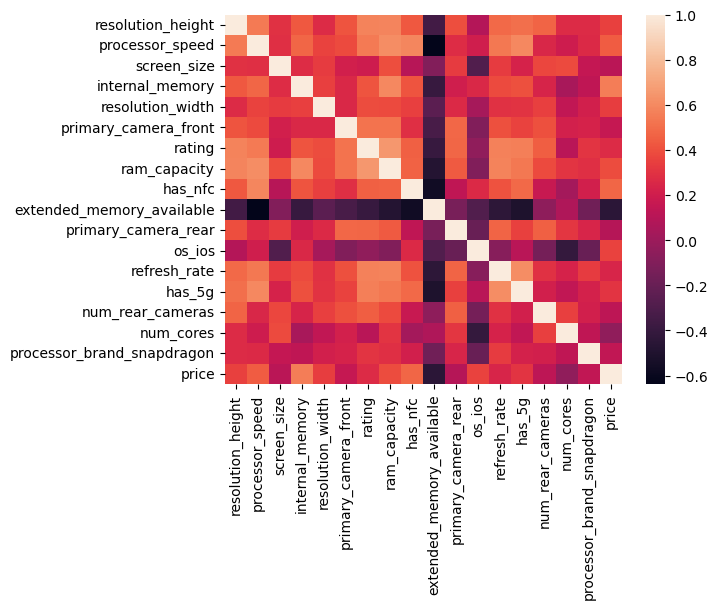

In [255]:
sns.heatmap(cleaned_dataset.corr())

In [256]:
cleaned_dataset.corr()

,resolution_height,processor_speed,screen_size,internal_memory,resolution_width,primary_camera_front,rating,ram_capacity,has_nfc,extended_memory_available,primary_camera_rear,os_ios,refresh_rate,has_5g,num_rear_cameras,num_cores,processor_brand_snapdragon,price
resolution_height,1.000000,0.540723,0.295926,0.427218,0.265519,0.413600,0.573264,0.578105,0.430081,-0.353785,0.394871,0.085882,0.481937,0.504365,0.465547,0.266635,0.267271,0.353578
processor_speed,0.540723,1.000000,0.287642,0.470255,0.356797,0.383356,0.540587,0.612892,0.585894,-0.638238,0.275063,0.203569,0.538874,0.592640,0.249775,0.190929,0.260010,0.437674
screen_size,0.295926,0.287642,1.000000,0.276401,0.334099,0.208183,0.190440,0.396613,0.103099,-0.094878,0.329288,-0.290741,0.333411,0.230598,0.371769,0.380662,0.150439,0.113253
internal_memory,0.427218,0.470255,0.276401,1.000000,0.341709,0.252802,0.413288,0.592332,0.413071,-0.397903,0.200656,0.254122,0.380263,0.403837,0.236609,0.043670,0.131773,0.557168
resolution_width,0.265519,0.356797,0.334099,0.341709,1.000000,0.257120,0.388216,0.380274,0.342789,-0.249250,0.257728,0.039355,0.294688,0.301828,0.342834,0.137969,0.209107,0.340592
primary_camera_front,0.413600,0.383356,0.208183,0.252802,0.257120,1.000000,0.518717,0.516723,0.284697,-0.326842,0.477008,-0.105072,0.400333,0.357845,0.404859,0.218583,0.228075,0.159720
rating,0.573264,0.540587,0.190440,0.413288,0.388216,0.518717,1.000000,0.650294,0.453310,-0.396408,0.471528,-0.047466,0.569909,0.564532,0.446778,0.104670,0.305701,0.268652
ram_capacity,0.578105,0.612892,0.396613,0.592332,0.380274,0.516723,0.650294,1.000000,0.458336,-0.482666,0.431377,-0.103366,0.573977,0.533957,0.384908,0.303464,0.287229,0.386002
has_nfc,0.430081,0.585894,0.103099,0.413071,0.342789,0.284697,0.453310,0.458336,1.000000,-0.564380,0.131004,0.261380,0.410777,0.481702,0.166299,0.027526,0.206934,0.470951
extended_memory_available,-0.353785,-0.638238,-0.094878,-0.397903,-0.249250,-0.326842,-0.396408,-0.482666,-0.564380,1.000000,-0.136152,-0.289965,-0.445877,-0.507752,-0.055110,0.070967,-0.170529,-0.448628
